In [2]:
import urllib

In [18]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open('titanic.csv', 'wb') as f:
    f.write(html)

In [19]:
!ls -l

total 29568
-rw-rw-r--@  1 giorgivanadze  staff  5885314 Oct 25  2022 FIFA23_official_data.csv
drwx------@ 10 giorgivanadze  staff      320 Mar 23 23:33 archive
-rw-rw-r--@  1 giorgivanadze  staff  9182017 Oct 25  2022 data.csv
-rw-r--r--@  1 giorgivanadze  staff     7594 Mar 23 23:57 soccer.ipynb
-rw-r--r--@  1 giorgivanadze  staff    60302 Mar 23 23:57 titanic.csv


In [20]:
import pandas as pd

In [23]:
df = pd.read_csv("titanic.csv", header=0)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

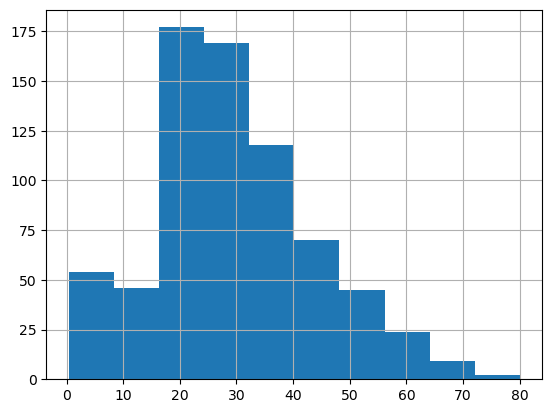

In [26]:
df["Age"].hist()

In [27]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [30]:
df[df["Sex"]=="female"].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [33]:
df.sort_values("Age", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [45]:
numeric_columns = df.select_dtypes(include=['int', 'float'])
survived_group = numeric_columns.groupby("Survived")
survived_group.mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [46]:
df.iloc[0, 1]

0

In [47]:
df.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [55]:
df[pd.isnull(df).any(axis=1)].head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [56]:
df = df.dropna()
df = df.reset_index()
df.head()

,level_0,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [57]:
df = df.drop(["Name", "Cabin", "Ticket"], axis=1)
df.head()

,level_0,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,2,1,1,female,38.0,1,0,71.2833,C
1,1,3,4,1,1,female,35.0,1,0,53.1000,S
2,2,6,7,0,1,male,54.0,0,0,51.8625,S
3,3,10,11,1,3,female,4.0,1,1,16.7000,S
4,4,11,12,1,1,female,58.0,0,0,26.5500,S


In [58]:
df["Sex"] = df["Sex"].map({"female": 0, "male": 1}).astype(int)
df["Embarked"] = df["Embarked"].dropna().map({"S":0, "C":1, "Q":2}).astype(int)
df.head()

,level_0,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,2,1,1,0,38.0,1,0,71.2833,1
1,1,3,4,1,1,0,35.0,1,0,53.1000,0
2,2,6,7,0,1,1,54.0,0,0,51.8625,0
3,3,10,11,1,3,0,4.0,1,1,16.7000,0
4,4,11,12,1,1,0,58.0,0,0,26.5500,0


In [71]:
def get_family_size(SibSp, Parch):
    family_size = SibSp + Parch
    return family_size

df["family_size"] = df[["SibSp", "Parch"]].apply(lambda x: get_family_size(x["SibSp"], x["Parch"]), axis=1)
df.head()

,level_0,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
0,0,1,2,1,1,0,38.0,1,0,71.2833,1,1
1,1,3,4,1,1,0,35.0,1,0,53.1000,0,1
2,2,6,7,0,1,1,54.0,0,0,51.8625,0,0
3,3,10,11,1,3,0,4.0,1,1,16.7000,0,2
4,4,11,12,1,1,0,58.0,0,0,26.5500,0,0


In [72]:
df = df[['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'family_size', 'Fare', 'Embarked', 'Survived']]
df.head()

,PassengerId,Sex,Age,SibSp,Parch,family_size,Fare,Embarked,Survived
0,2,0,38.0,1,0,1,71.2833,1,1
1,4,0,35.0,1,0,1,53.1000,0,1
2,7,1,54.0,0,0,0,51.8625,0,0
3,11,0,4.0,1,1,2,16.7000,0,1
4,12,0,58.0,0,0,0,26.5500,0,1


In [74]:
df.to_csv("processed_titanic.csv", index=False)

In [75]:
!ls -l

total 29704
-rw-rw-r--@  1 giorgivanadze  staff  5885314 Oct 25  2022 FIFA23_official_data.csv
drwx------@ 10 giorgivanadze  staff      320 Mar 23 23:33 archive
-rw-rw-r--@  1 giorgivanadze  staff  9182017 Oct 25  2022 data.csv
-rw-r--r--   1 giorgivanadze  staff     5081 Mar 24 00:31 processed_titanic.csv
-rw-r--r--@  1 giorgivanadze  staff    66817 Mar 24 00:31 soccer.ipynb
-rw-r--r--@  1 giorgivanadze  staff    60302 Mar 23 23:57 titanic.csv
